In [1]:
# Clone the YOLOv5 repository
%cd /kaggle/working
!git clone https://github.com/ultralytics/yolov5

/kaggle/working
Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.67 MiB | 30.80 MiB/s, done.
Resolving deltas: 100% (11705/11705), done.


In [2]:
# Verify installation and install dependencies
!pip install -qr /kaggle/working/yolov5/requirements.txt

!pip uninstall wandb -qy  # deprecated dependency

!pip install -q roboflow==1.1.48

!pip install roboflow

In [3]:
# Import necessary libraries and check GPU availability
import torch

from IPython.display import Image, clear_output  # to display images
clear_output()
print(f'Setup complete. Using torch {torch.__version__} {"GPU" if torch.cuda.is_available() else "CPU"}')


Setup complete. Using torch 2.4.0 GPU


In [4]:
%cd /kaggle/working/yolov5

/kaggle/working/yolov5


In [5]:
# Initialize Roboflow and download the dataset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eLcysmG3bmzKjtegoQUU")
project = rf.workspace("it-2kyzc").project("road-condition-detection-7iwxm")
version = project.version(3)
dataset = version.download("yolov5")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ROAD-CONDITION-DETECTION-3 in yolov5pytorch:: 100%|██████████| 2206/2206 [00:00<00:00, 6791.30it/s]


In [6]:
# Setup TensorBoard for visualization
#%load_ext tensorboard
#%tensorboard --logdir /kaggle/working/yolov5/runs

In [7]:
# Train YOLOv5 model on custom data for 25 epochs
# Time its performance

%cd /kaggle/working/yolov5/
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 50 \
  --data {dataset.location}/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results \
  --cache

/kaggle/working/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/ROAD-CONDITION-DETECTION-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interv

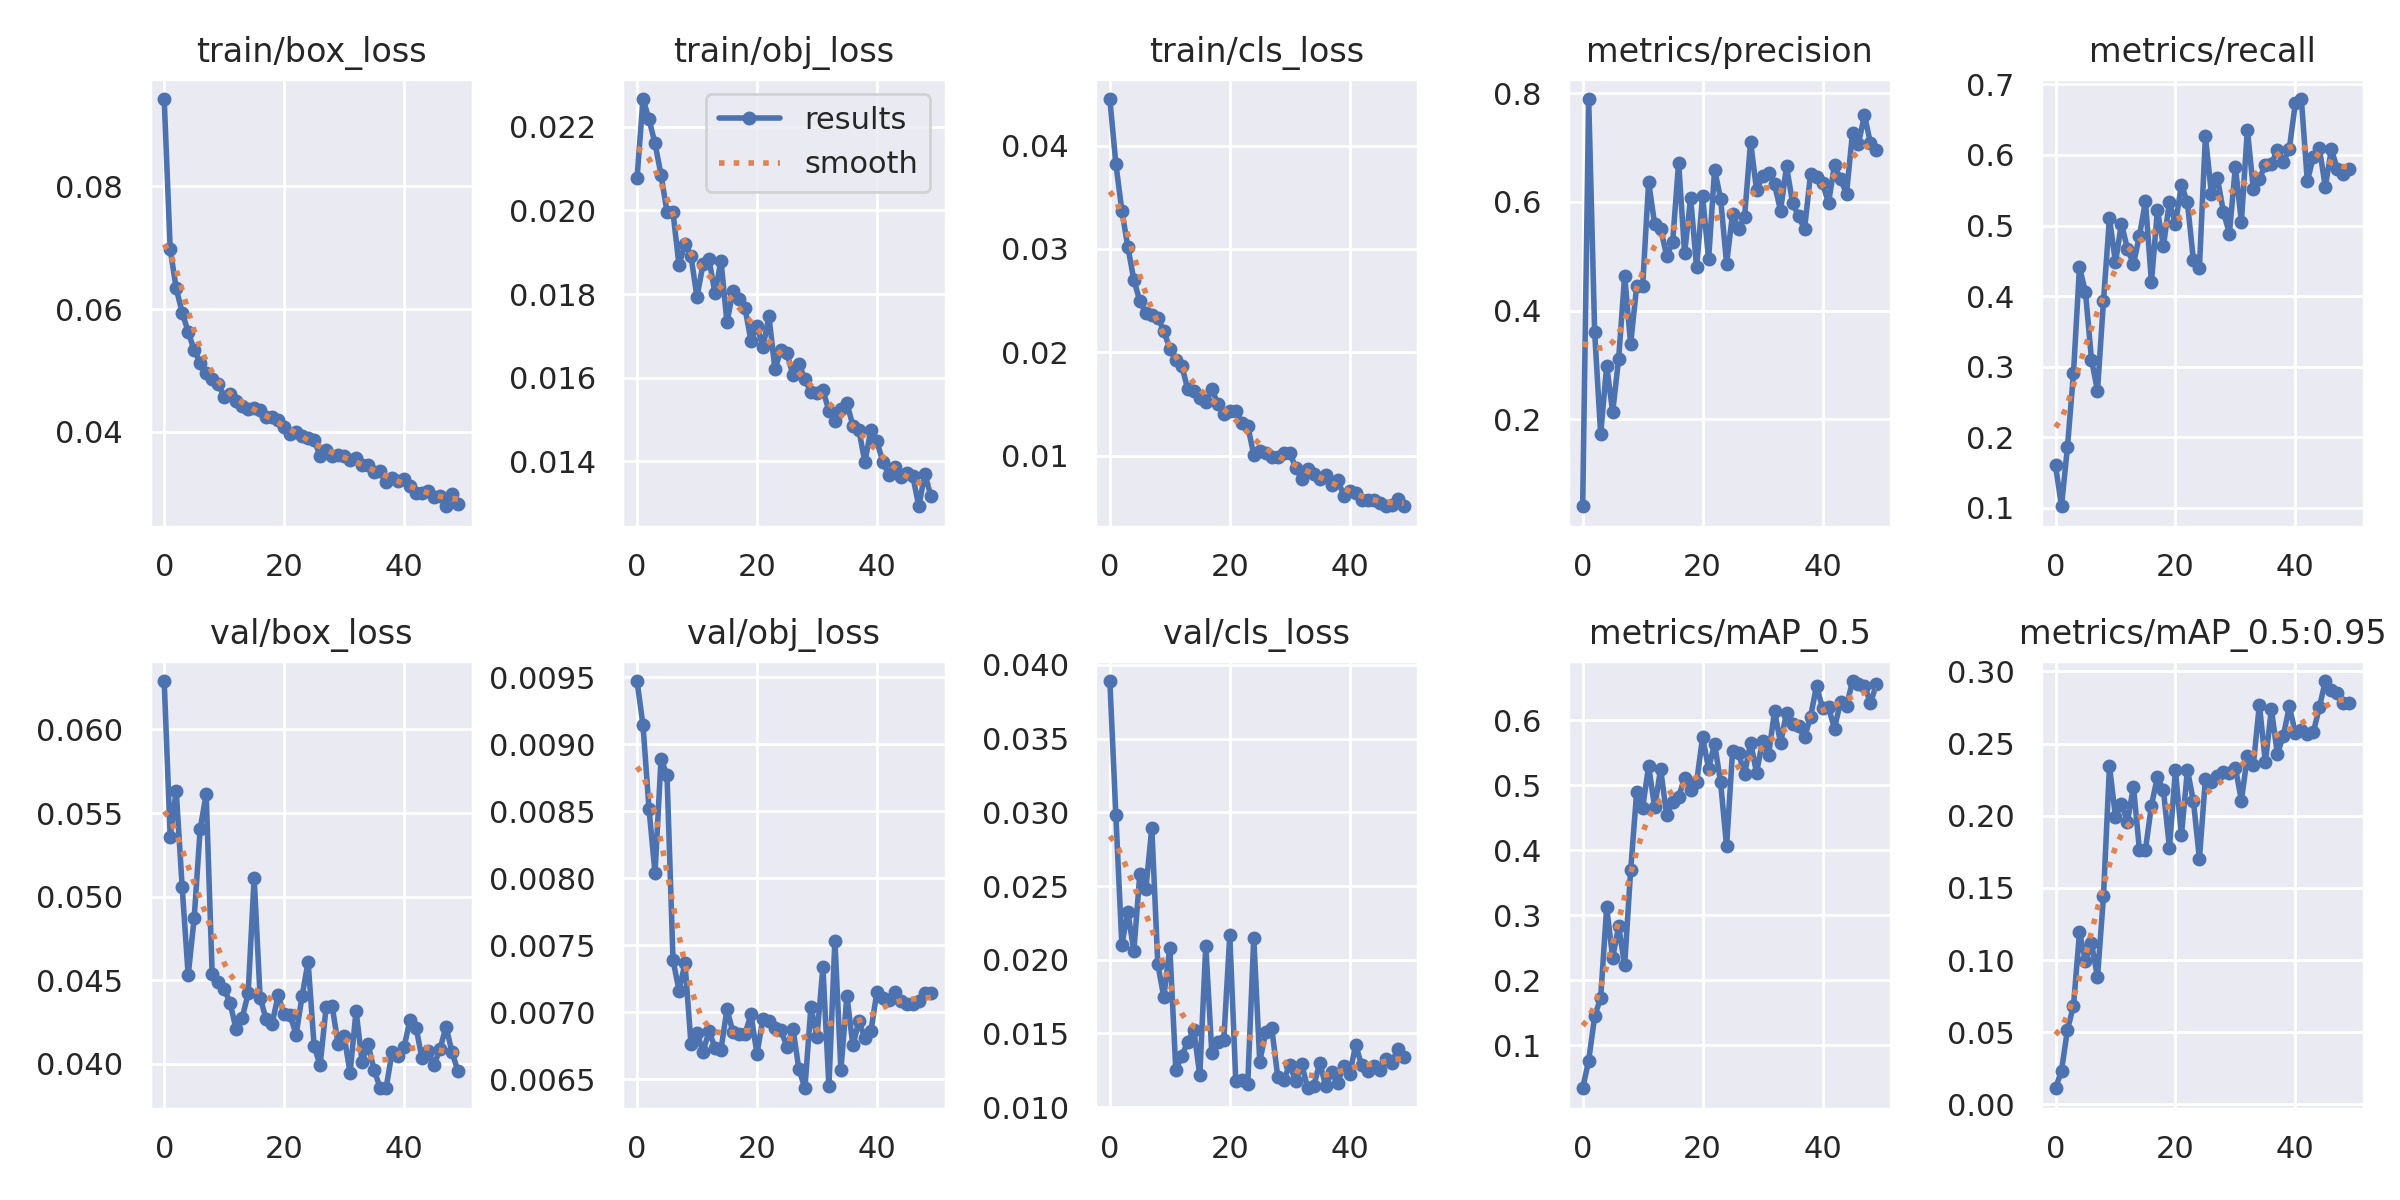

In [16]:
from utils.plots import plot_results  # plot results.txt as results.png

Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/results.png', width=1000)

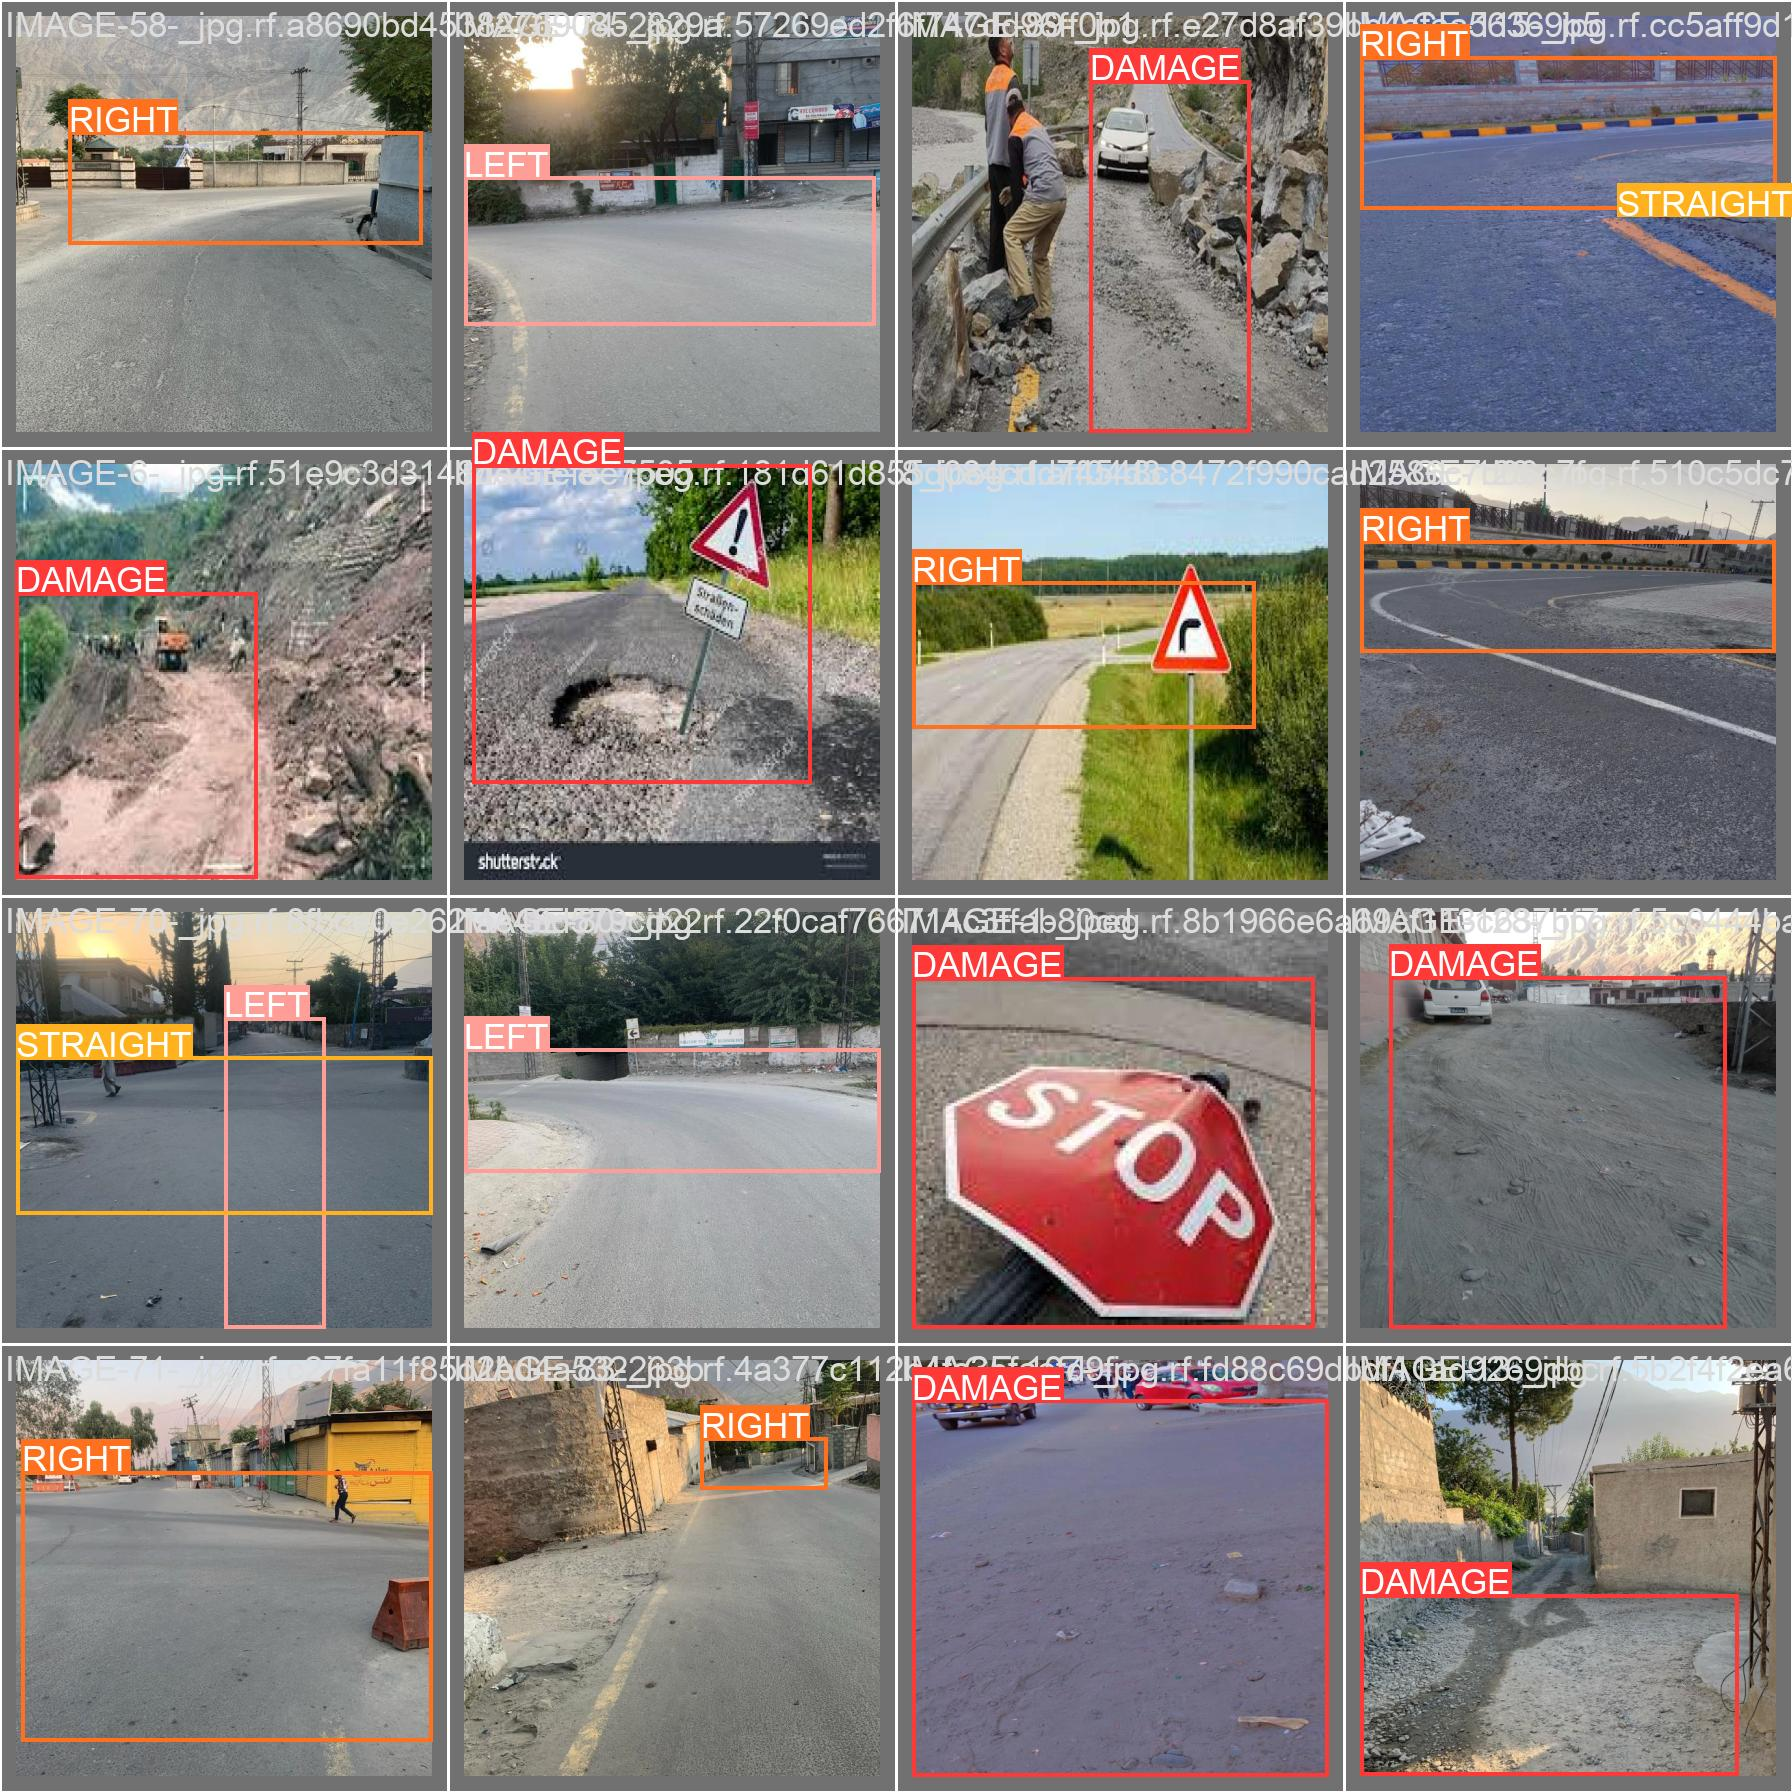

In [9]:
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


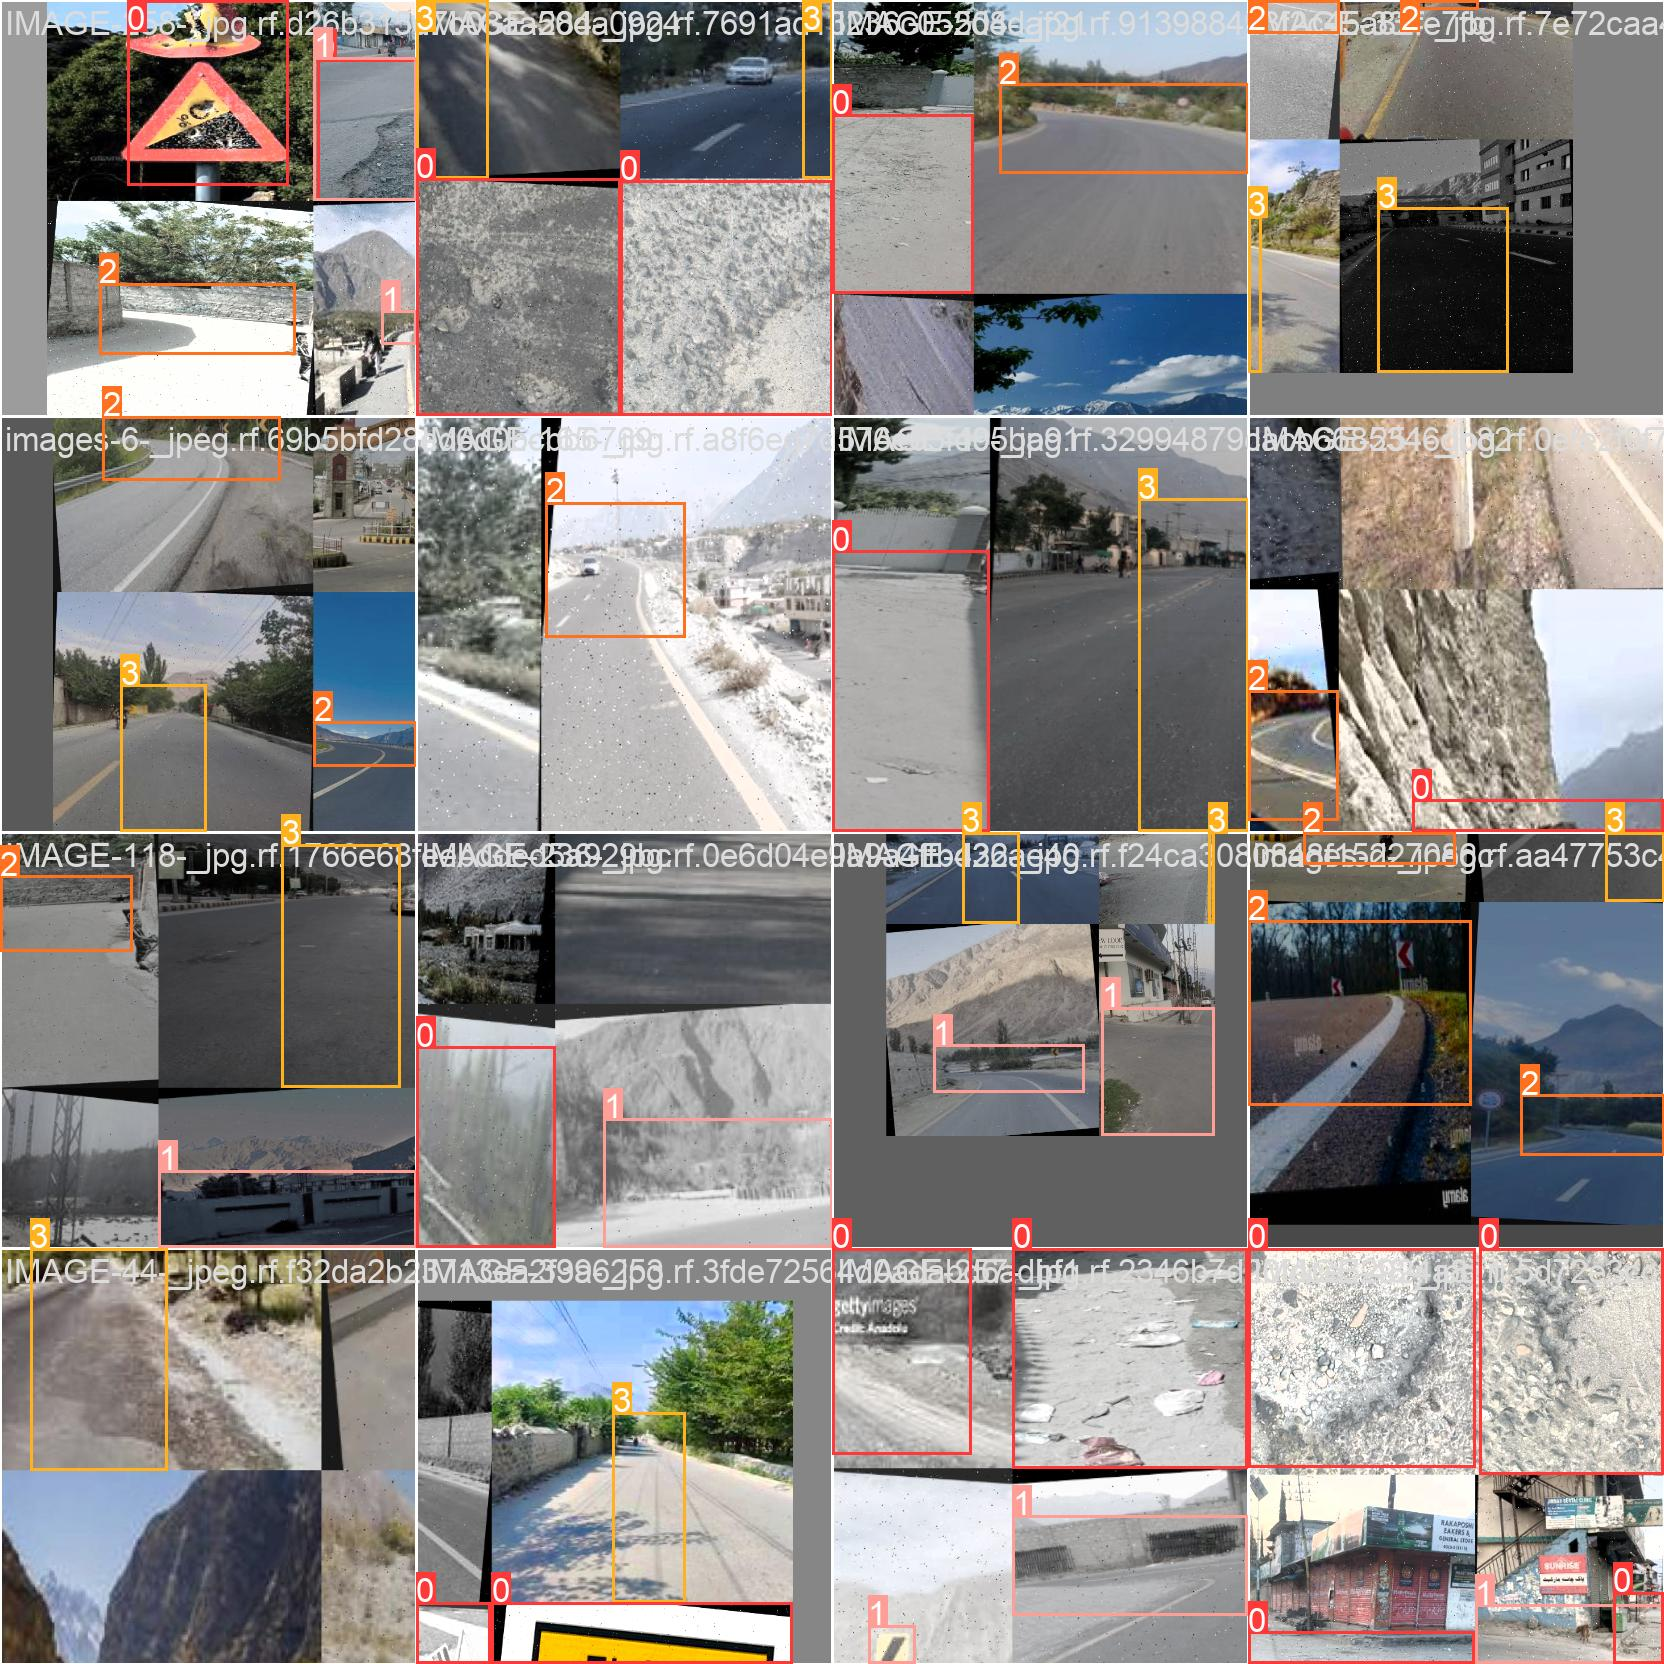

In [10]:
# print out an augmented training example

print("GROUND TRUTH AUGMENTED TRAINING DATA:")

Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/train_batch2.jpg', width=900)

In [11]:
# trained weights are saved by default in our weights folder

%ls runs/train/yolov5s_results/weights


best.pt  last.pt


In [12]:

# Run inference on the test images
%cd /kaggle/working/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/


/kaggle/working/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/kaggle/working/yolov5/ROAD-CONDITION-DETECTION-3/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/46 /kaggle/working/yolov5/ROAD-CONDITION-DETECTION-3/test/images/3_jpeg.rf.ec00275f358ab09a016b8144d4612e1b.jpg: 416x416 2 RIGHTs, 5.9ms
image 2/46 /kaggle/working/yolov5/ROAD-CONDITION-DETECTION-3/test/images/4_jpeg.rf.f4

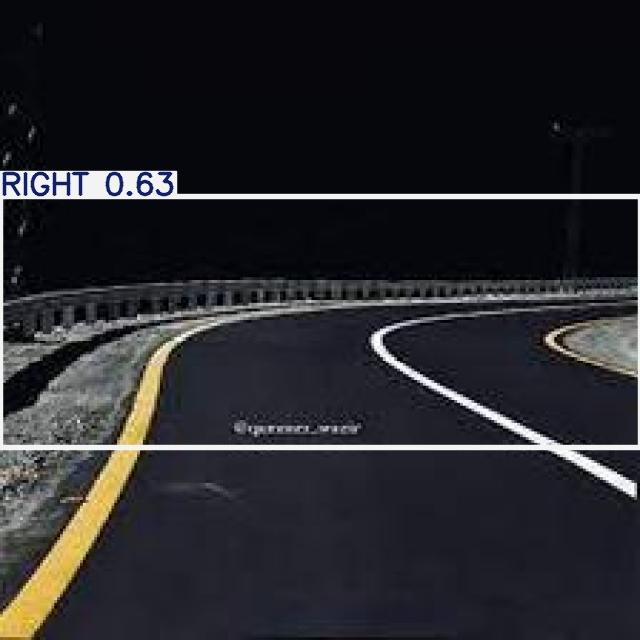

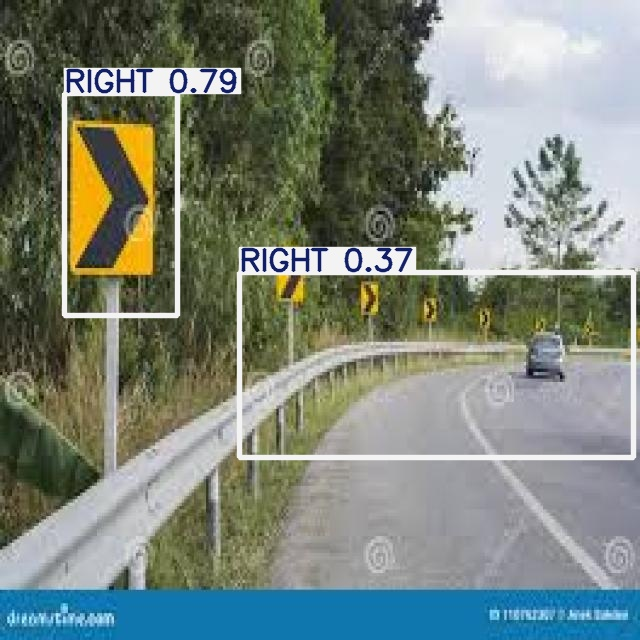

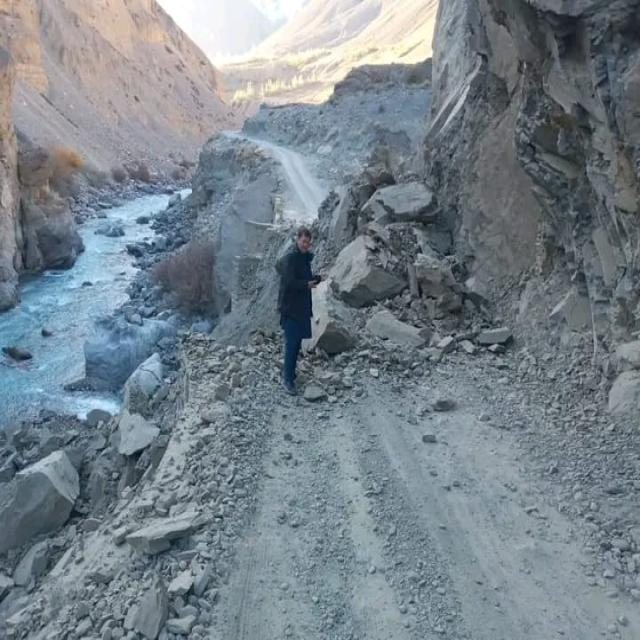

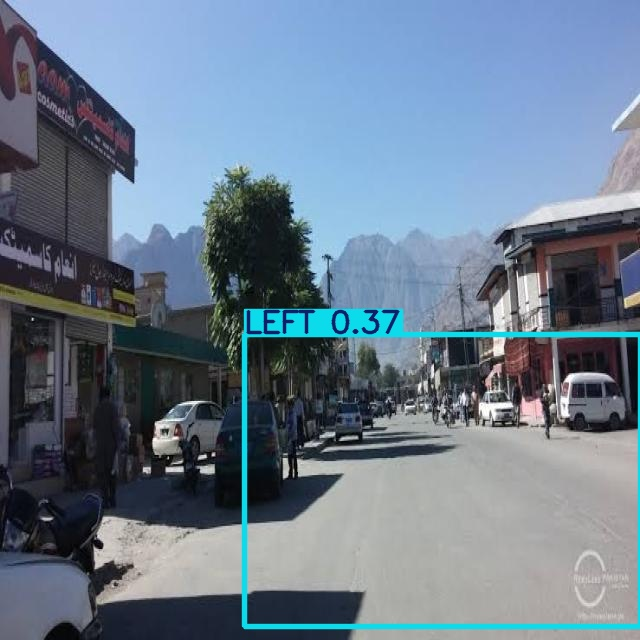

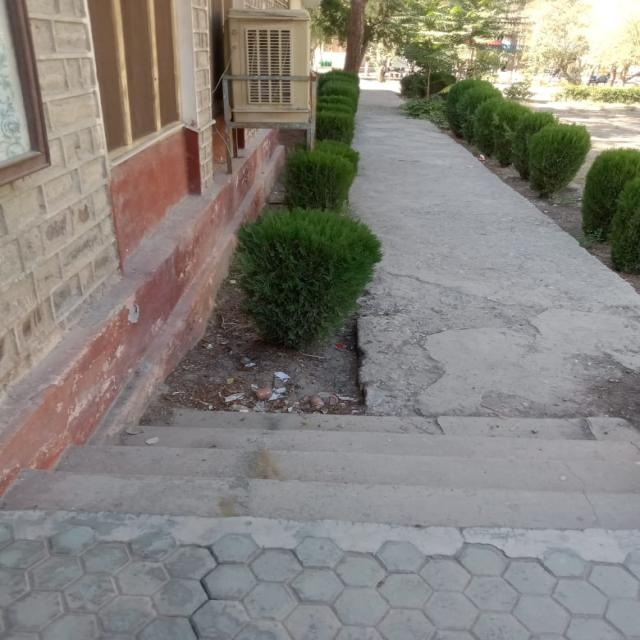

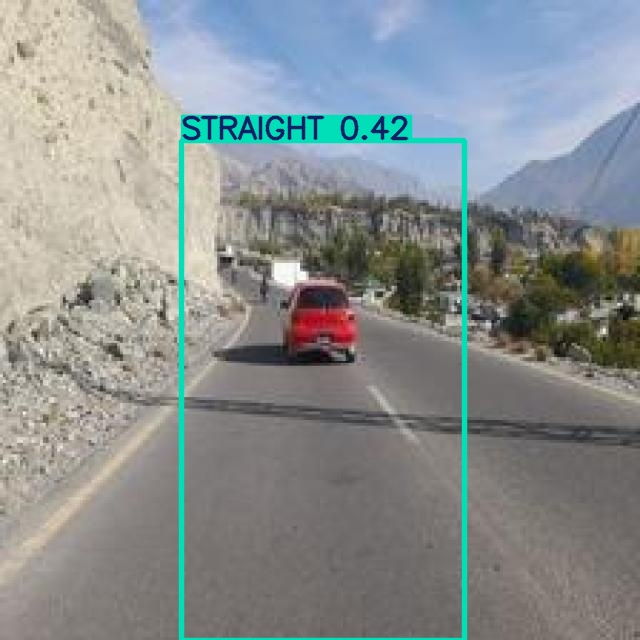

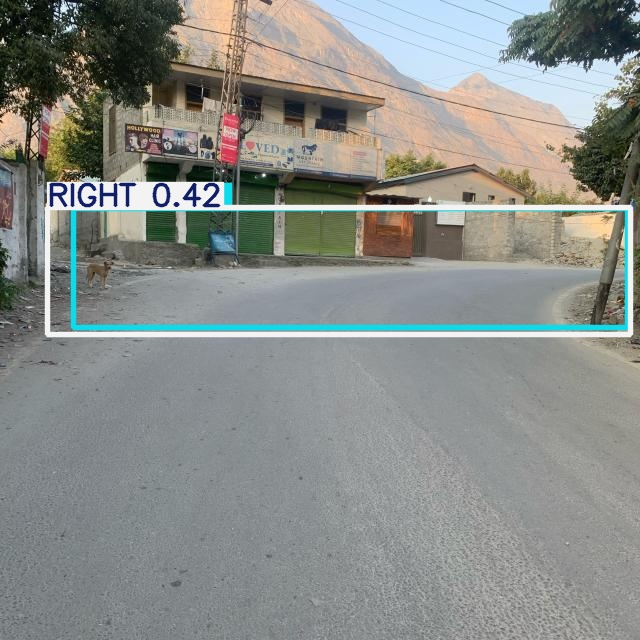

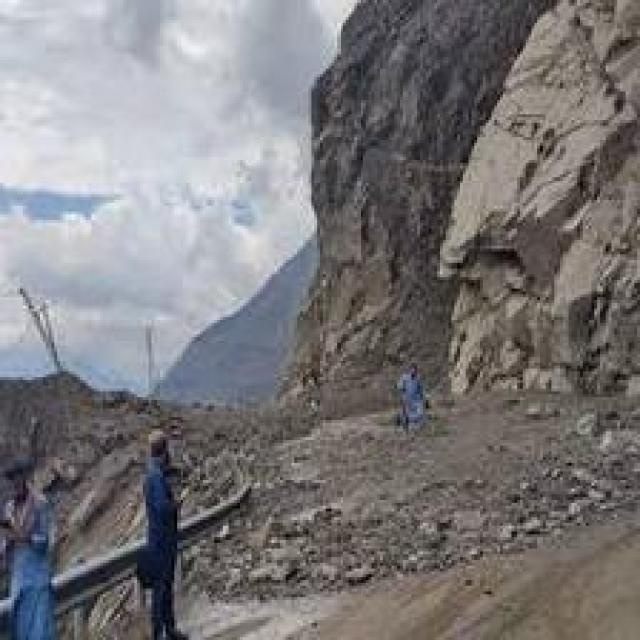

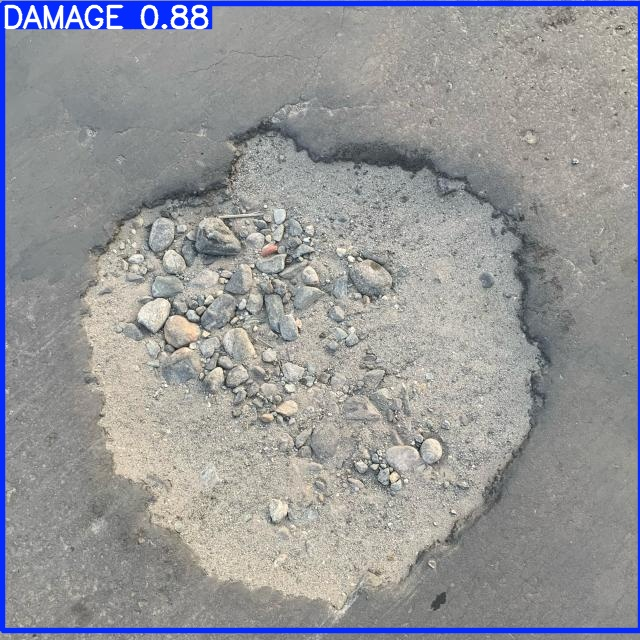

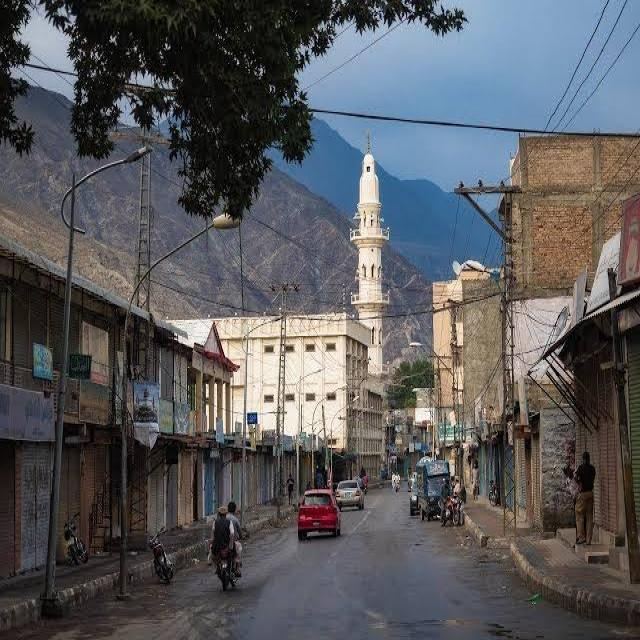

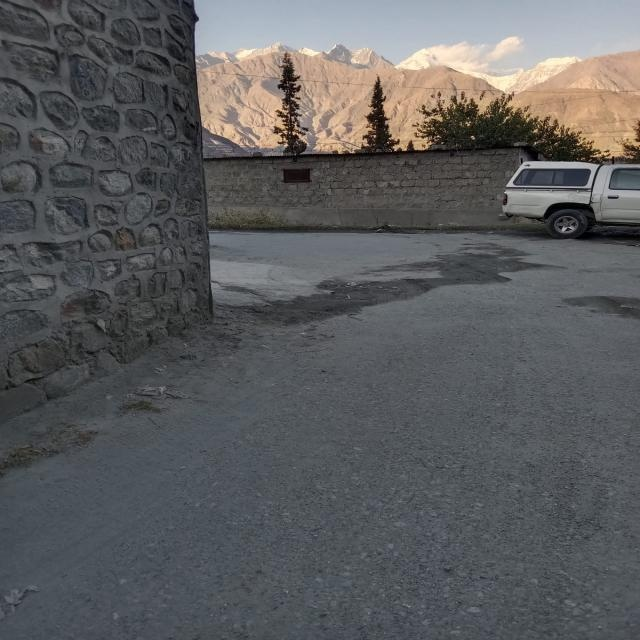

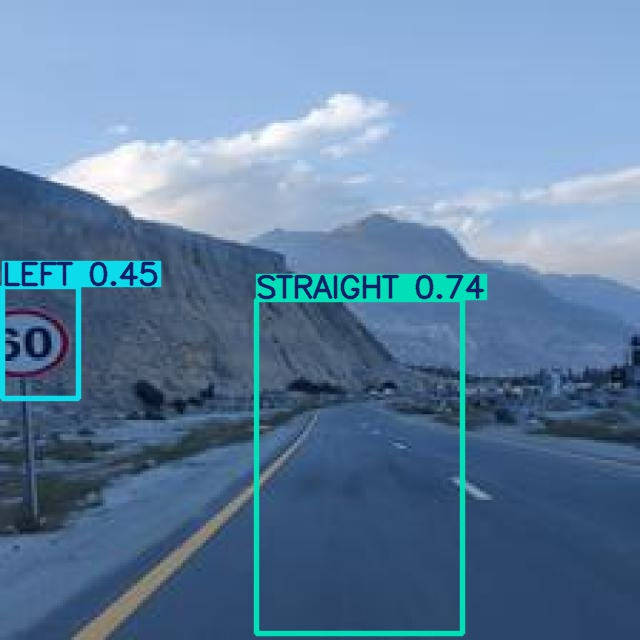

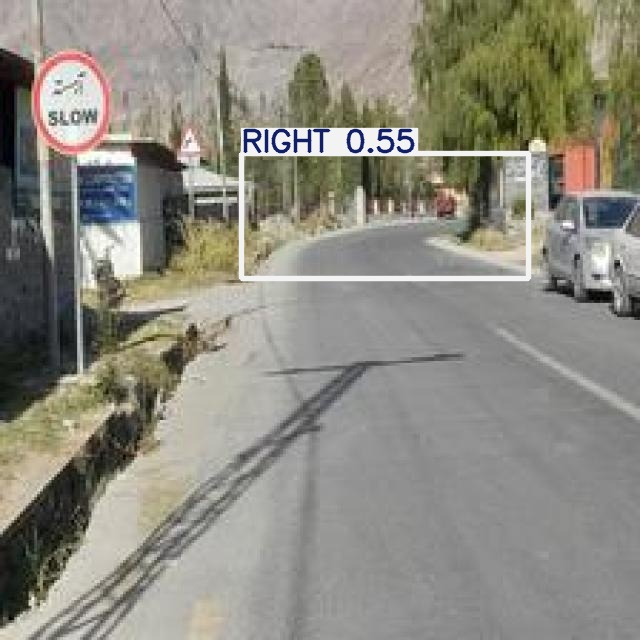

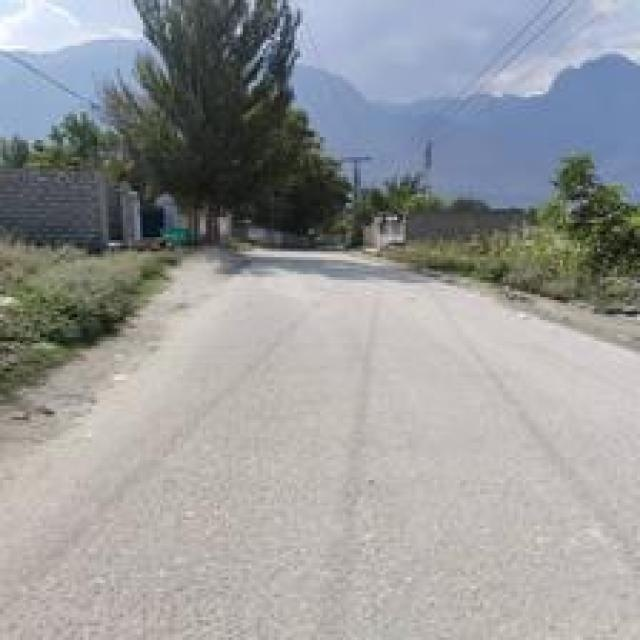

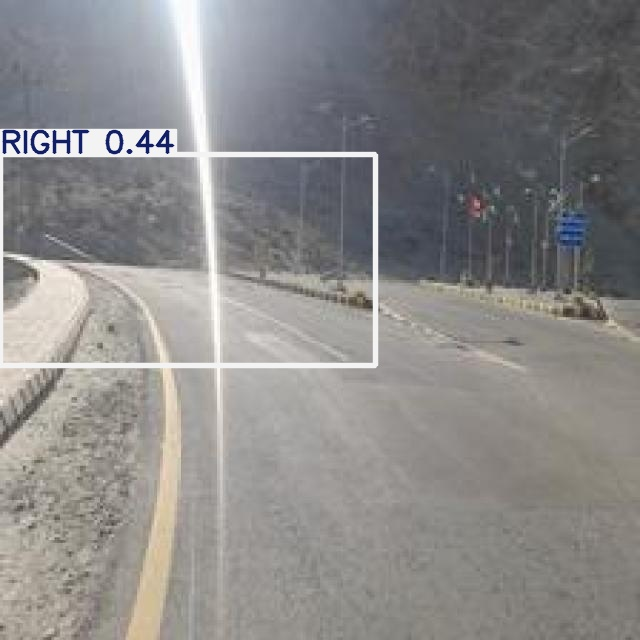

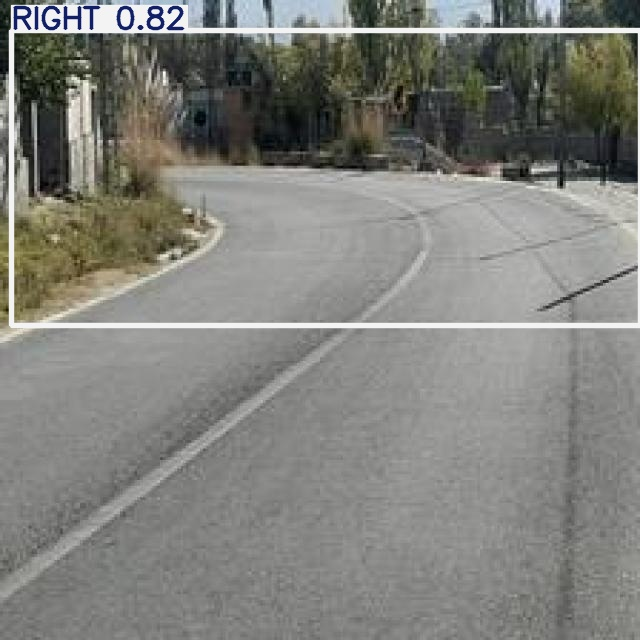

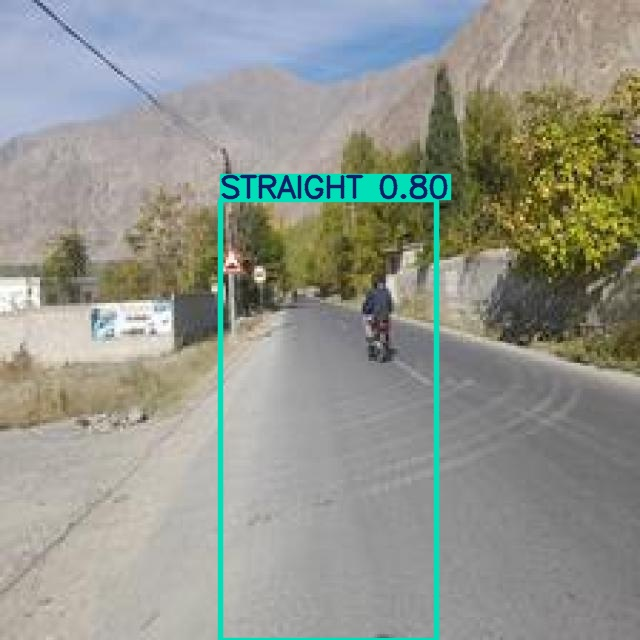

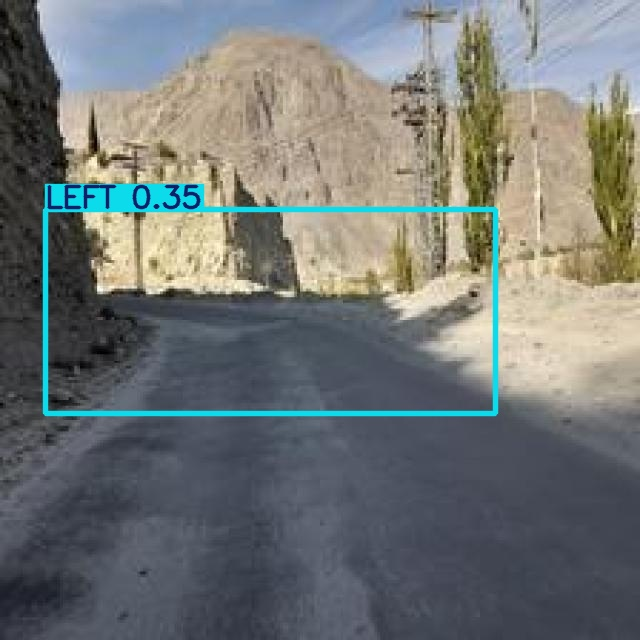

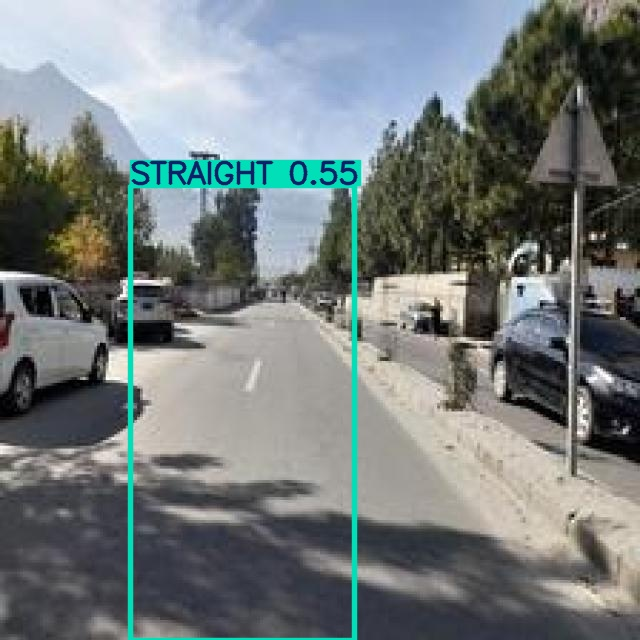

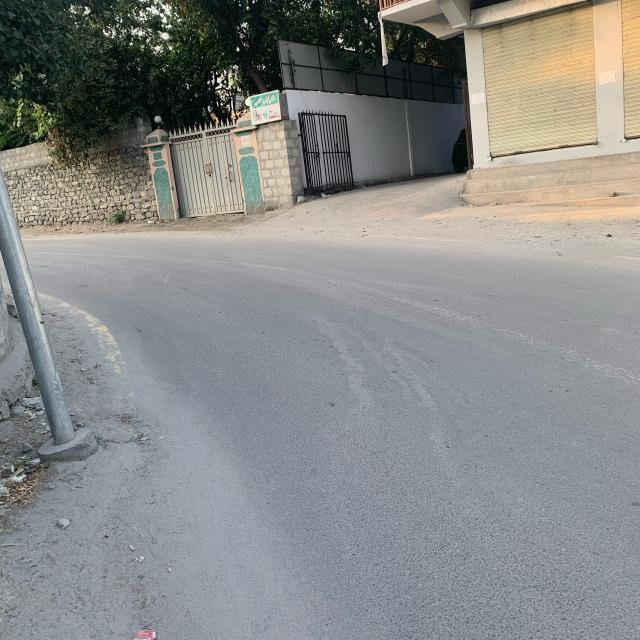

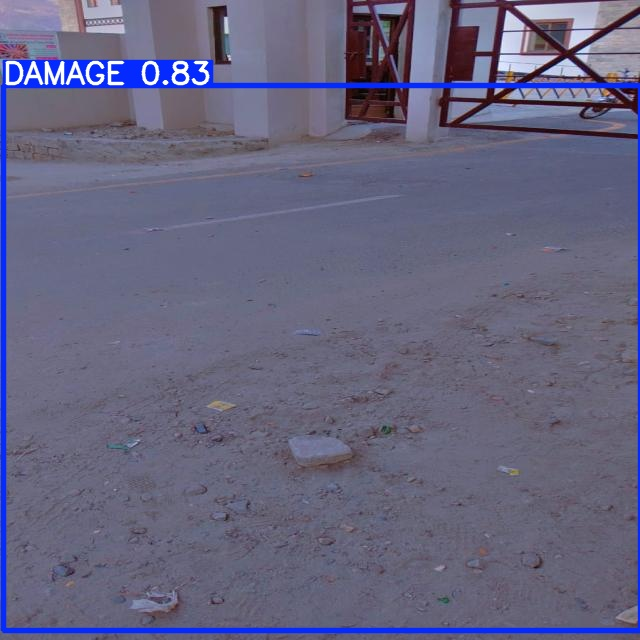

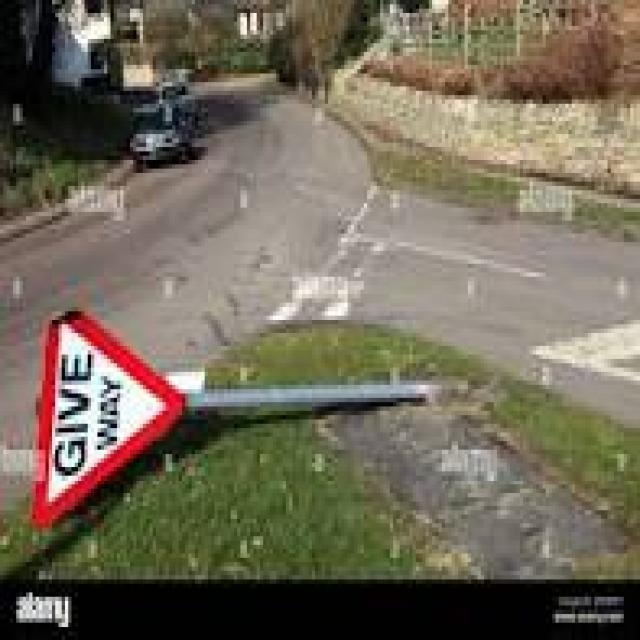

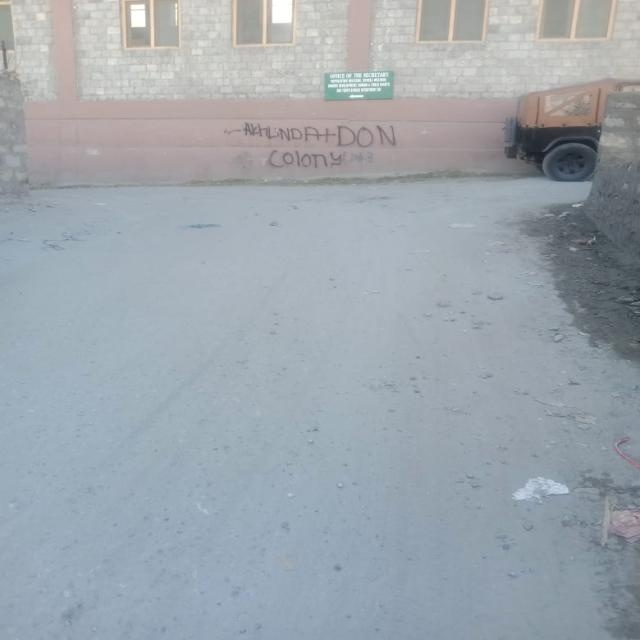

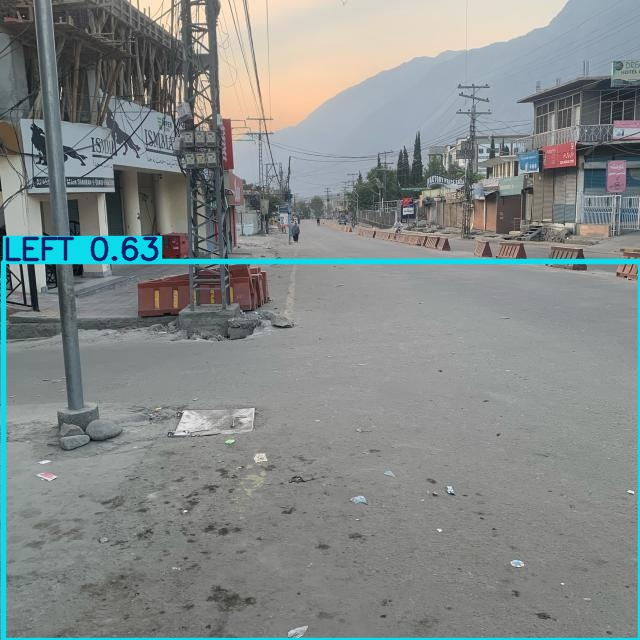

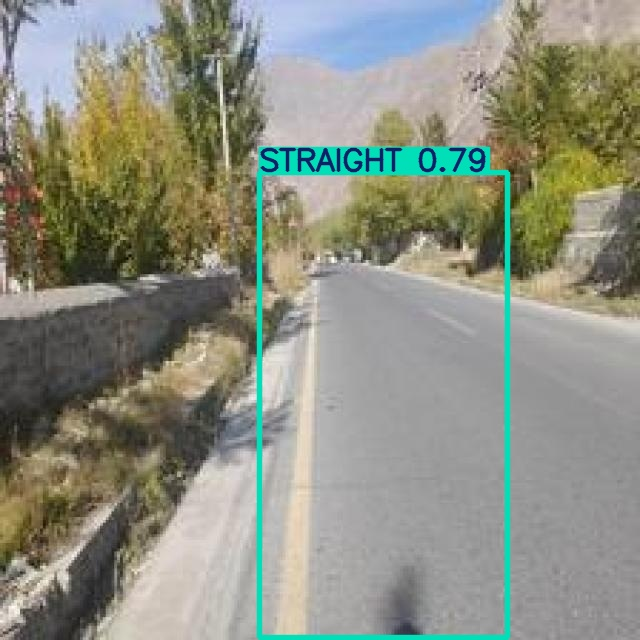

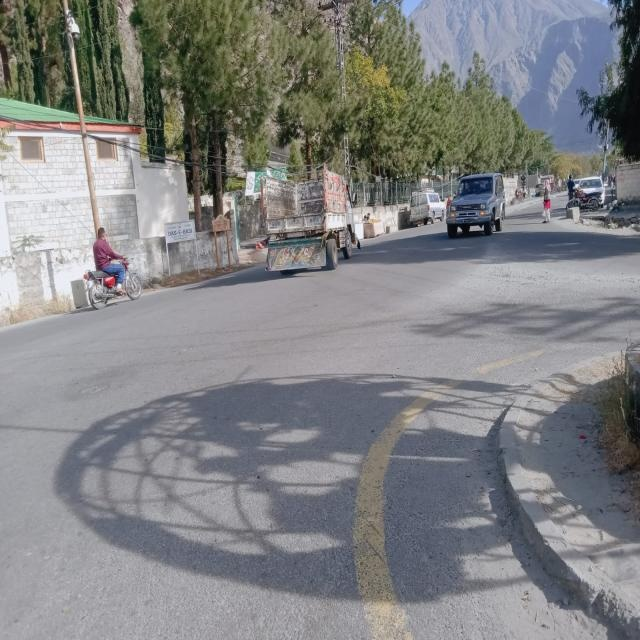

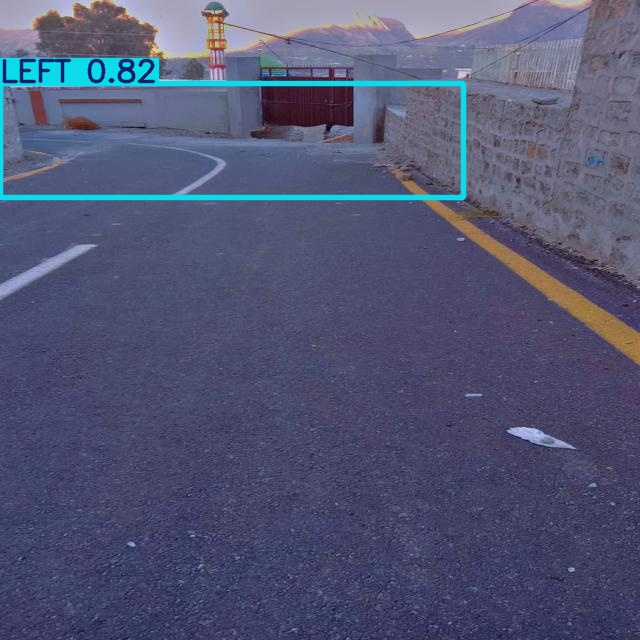

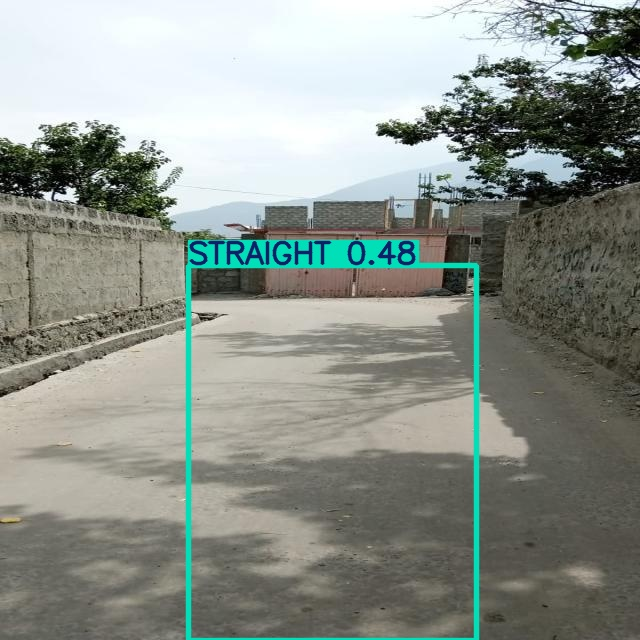

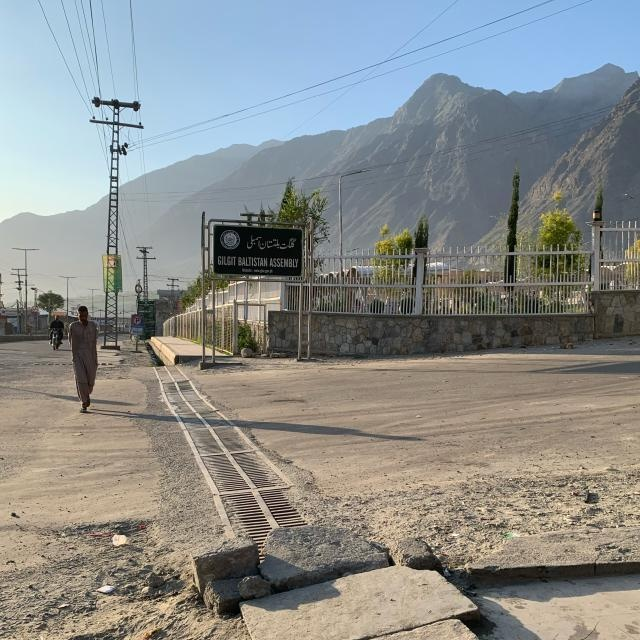

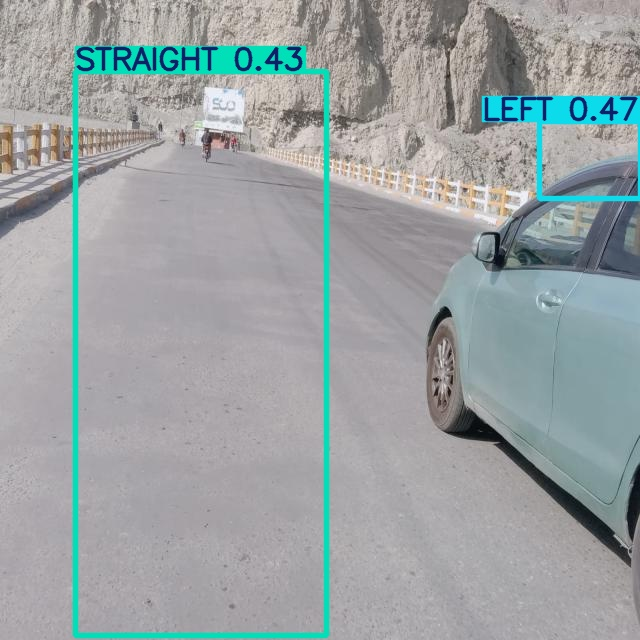

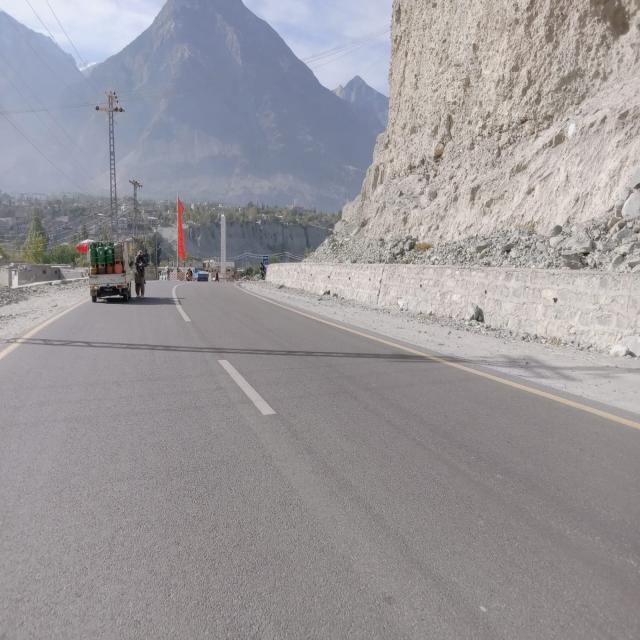

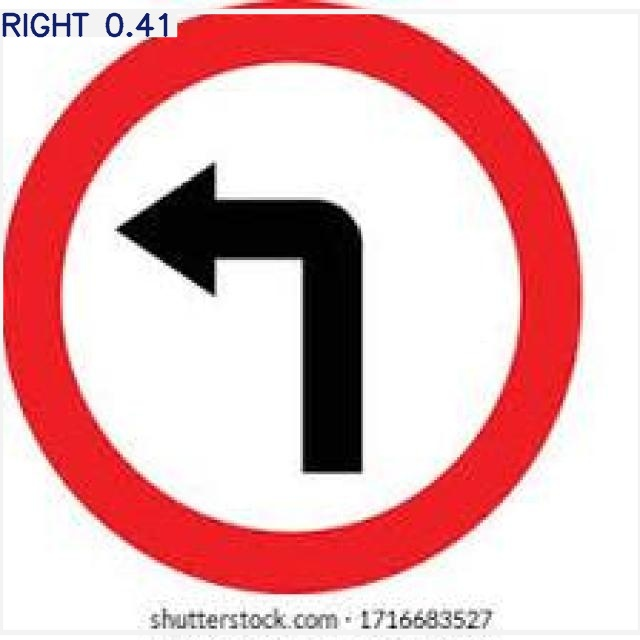

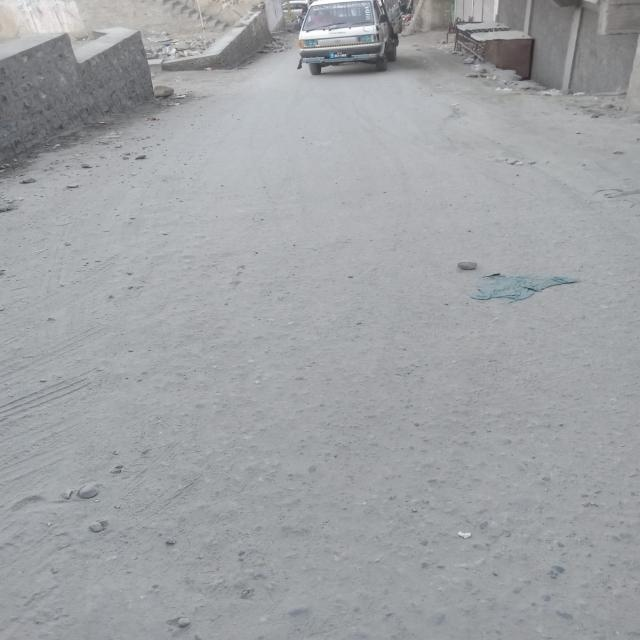

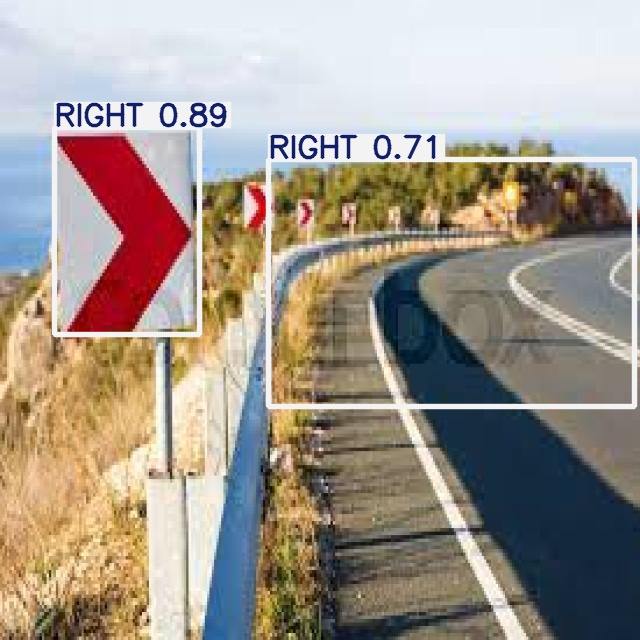

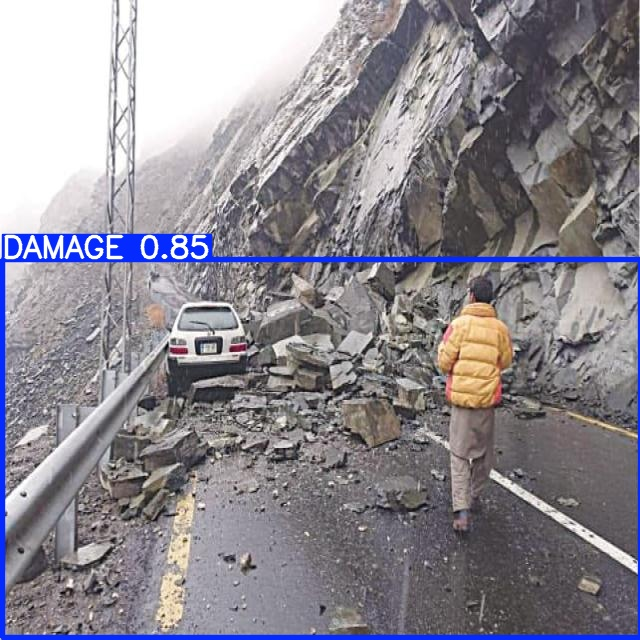

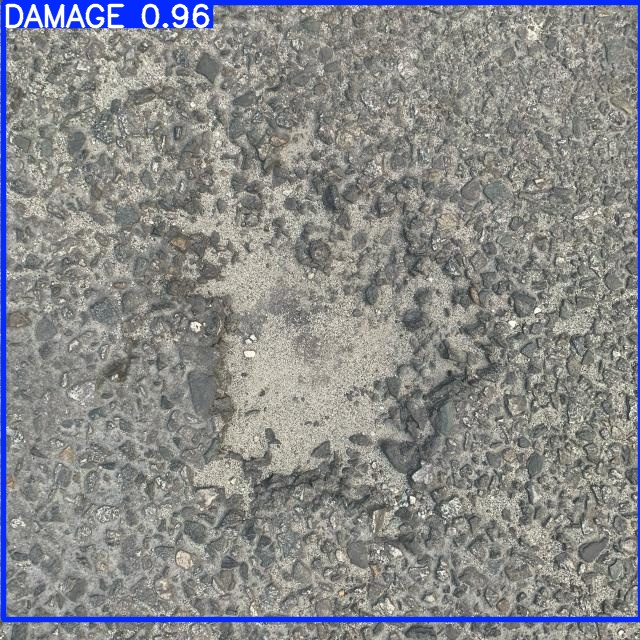

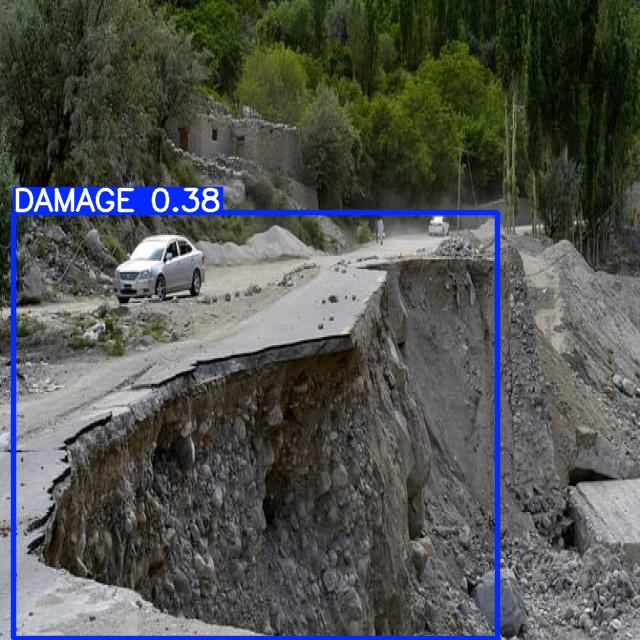

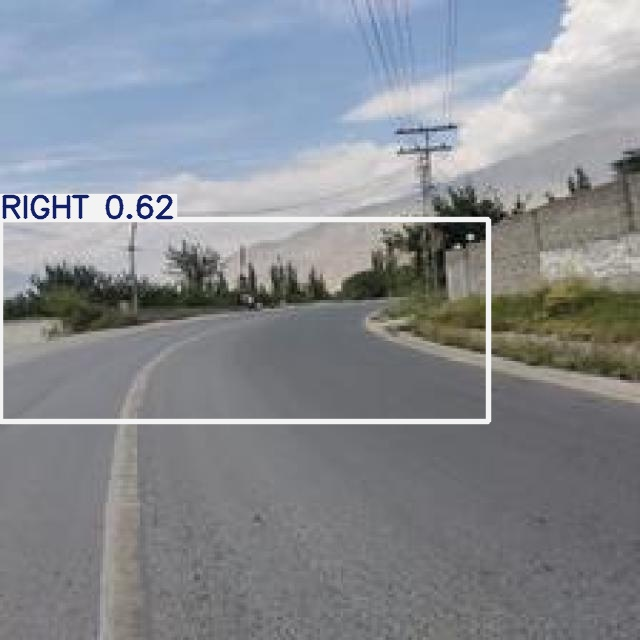

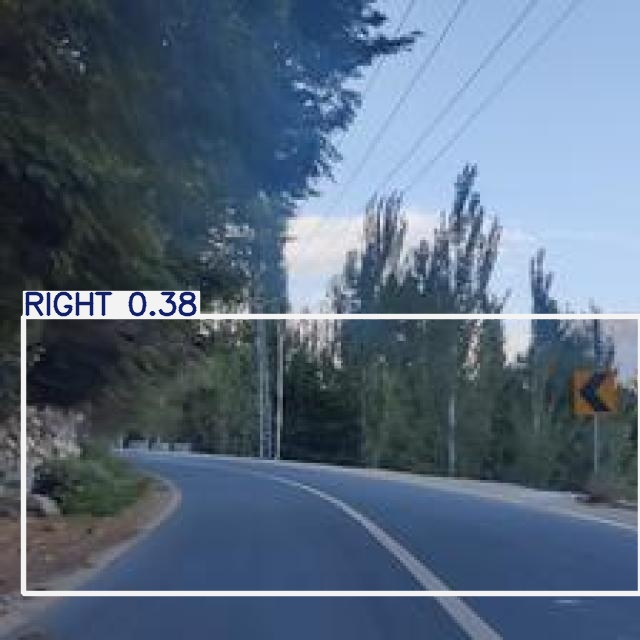

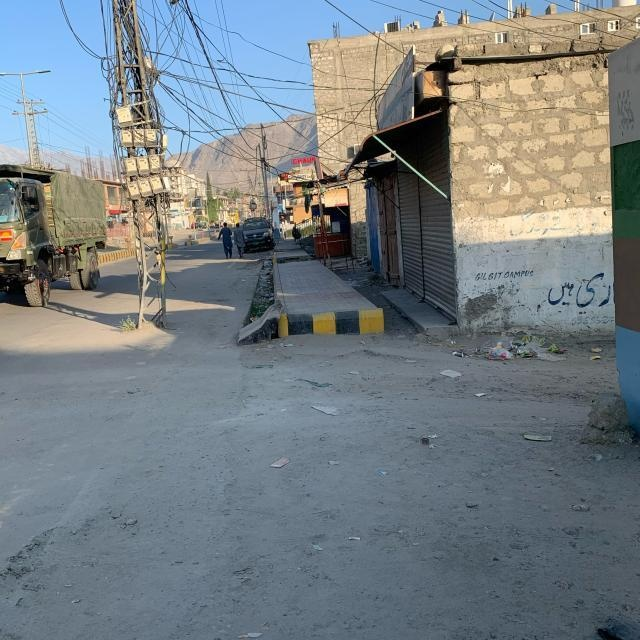

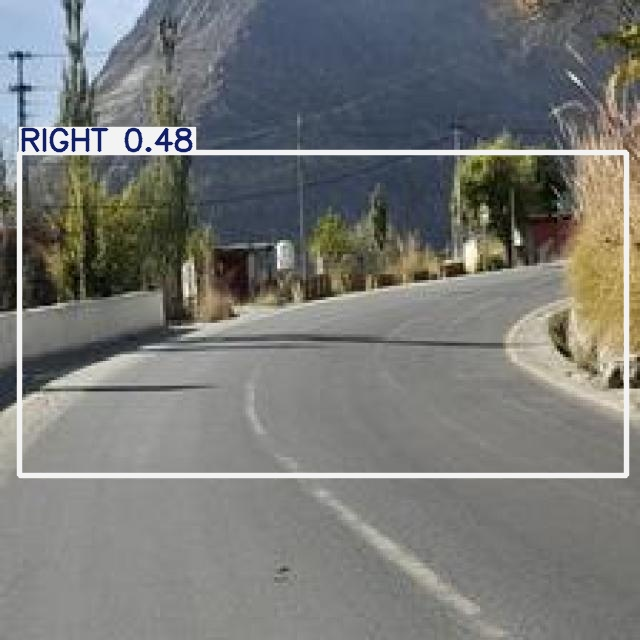

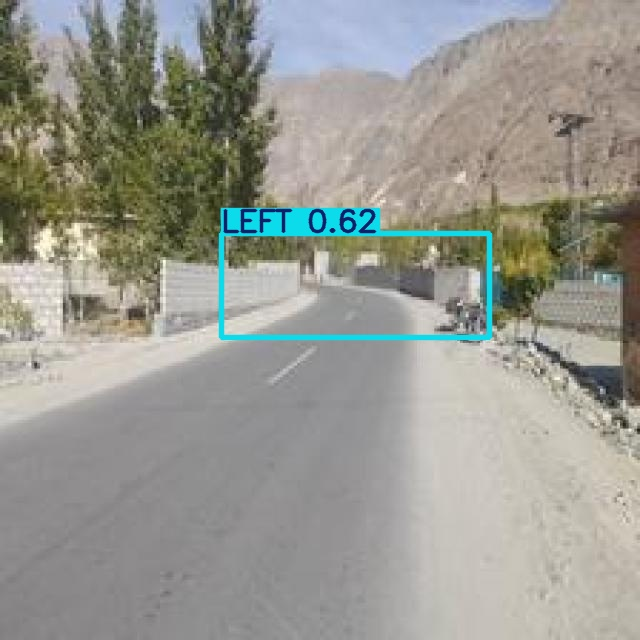

In [13]:
import glob

from IPython.display import Image, display



for imageName in glob.glob('/kaggle/working/yolov5/runs/detect/exp/*.jpg')[0:42]: #assuming JPG

    display(Image(filename=imageName))